# Cluster results notebook

In this notebook the outcomes are clustered on the amount of wind energy in use and electric cars in use. 

1. First, the necessary libraries.
2. Then, certain functions are defined. and the model name are imported. 
3. The clusters for electric cars are made.
4. The clusters for wind energy are made
3. Lastly, the results are saved

## 1. Import libraries

In [1]:
from warnings import filterwarnings
filterwarnings(action='ignore', category=DeprecationWarning, message='`np.bool` is a deprecated alias')
from ema_workbench import ( CategoricalParameter, perform_experiments, RealParameter,  ema_logging, \
                           TimeSeriesOutcome, Constant, save_results, load_results, MultiprocessingEvaluator )
from ema_workbench.connectors.vensim import VensimModel

C:\Users\User\Anaconda3\lib\site-packages\ema_workbench\connectors\__init__.py:32: ImportWarning: simio connector not available
  warnings.warn("simio connector not available", ImportWarning)


In [2]:
from __future__ import (absolute_import, print_function, division, unicode_literals)
from ema_workbench import (Model, RealParameter, CategoricalParameter, ScalarOutcome, Constant,\
                           Policy, perform_experiments, ema_logging, \
                           TimeSeriesOutcome, perform_experiments,save_results, load_results)
#from ema_workbench.em_framework.evaluators import LHS, SOBOL, MORRIS
from ema_workbench.analysis import (clusterer, plotting, Density, pairs_plotting, get_ex_feature_scores, \
                                    RuleInductionType, feature_scoring)
from ema_workbench.analysis import scenario_discovery_util as sdutil
from ema_workbench.analysis.plotting_util import do_titles,do_ylabels, TIME
import ema_workbench.analysis.plotting_util as plt_util
from ema_workbench.analysis.plotting import group_by_envelopes, single_envelope, plot_lines_with_envelopes, prepare_data 
from ema_workbench.analysis.plotting import simple_kde, group_density, plot_envelope, simple_density
from ema_workbench.analysis.plotting import lines, envelopes, kde_over_time, multiple_densities
from ema_workbench.analysis.pairs_plotting import pairs_scatter, pairs_density
import ema_workbench.analysis.cart as cart
from ema_workbench.analysis.pairs_plotting import (pairs_lines, pairs_scatter,pairs_density)
import numpy as np
import seaborn as sns #; sns.set(style="ticks", color_codes=True)
import pandas as pd
import matplotlib.pyplot as plt
TIME_LABEL = 'Time'

import importlib
importlib.reload(sdutil)
importlib.reload(cart)

import itertools
import datetime
import math
import matplotlib.gridspec as gridspec
import scipy.stats.kde as kde
from matplotlib.colors import ColorConverter
from matplotlib.collections import PolyCollection, PathCollection
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie
from matplotlib.ticker import FormatStrFormatter, FuncFormatter
from matplotlib.patches import ConnectionPatch
import matplotlib.font_manager as fm
import matplotlib as mpl

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. I

## 2. Define functions & import data

In [3]:
def plot_clusters (column,x, cluster_name, zero = False,ylabel = False, alpha = None, title=False):
    dataset = outcomes
    expdata = experiments
    
    if title:
    #plot the clusters
        lines(x, dataset,group_by = cluster_name,outcomes_to_show = column,
        density=Density.KDE, titles=title)
    else:
        lines(x, dataset,group_by = cluster_name,outcomes_to_show = column,
        density=Density.KDE)
    fig = plt.gcf()
    ax = fig.get_axes()
    ax[0].set_xticklabels(labels_time)
    fig.set_size_inches(7,5)
    
    if alpha:
        for line in ax[0].get_lines():
            line.set_alpha(alpha)
    #layout
    plt.margins(0)
    sns.despine()
    if zero == True:
        ax[0].set_ylim([0,None])
        ax[0].set_xticklabels(labels_time)
    if ylabel:
        ax[0].set(ylabel=ylabel)
    change_fontsize(fig)
    sns.despine()
    # save_fig(fig,wd,'clustering'+paradigm+column)
    
    return fig,ax

In [4]:
def change_fontsize(fig, fs=11.5):
    '''Change fontsize of figure items to specified size'''
    for ax in fig.axes:
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(fs)
        try:
            parasites = ax.parasites
        except AttributeError:
            pass
        else:
            for parisite in parasites:
                for axis in parisite.axis.values():
                    axis.major_ticklabels.set_fontsize(fs)
                    axis.label.set_fontsize(fs)
            for axis in ax.axis.values():
                axis.major_ticklabels.set_fontsize(fs)
                axis.label.set_fontsize(fs)
        if ax.legend_ != None:
            for entry in ax.legend_.get_texts():
                entry.set_fontsize(fs)
        for entry in ax.texts:
            entry.set_fontsize(fs)
        for entry in ax.tables:
            entry.set_fontsize(fs)

In [5]:
labels_time = [2000, 2010, 2020, 2030, 2040, 2050]
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['legend.frameon'] = False

In [6]:
results = load_results('Results/Model_runs.tar.gz')
experiments, outcomes = results

## 3. Clusters: electric cars

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator


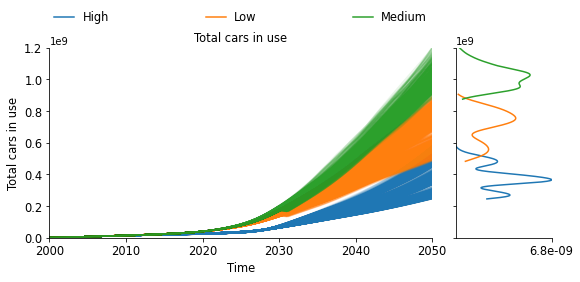

In [7]:
plot_clusters ('Total cars in use',experiments, 'EV clusters', zero = True, alpha=0.1)
fig = plt.gcf()
fig.set_size_inches(9,3.5)

In [8]:
experiments['EV clusters2'] = experiments['EV clusters'].astype(str)

In [9]:
experiments['EV clusters2'][experiments['EV clusters2'] == 'Low'] = 'Medium1'
experiments['EV clusters2'][experiments['EV clusters2'] == 'High'] = 'Low1'
experiments['EV clusters2'][experiments['EV clusters2'] == 'Medium'] = 'High1'

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we c

In [10]:
experiments['EV clusters2'][experiments['EV clusters2'] == 'Low1'] = 'Low'
experiments['EV clusters2'][experiments['EV clusters2'] == 'High1'] = 'High'
experiments['EV clusters2'][experiments['EV clusters2'] == 'Medium1'] = 'Medium'

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we c

In [11]:
experiments['EV clusters'] = experiments['EV clusters2'].astype(object)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator


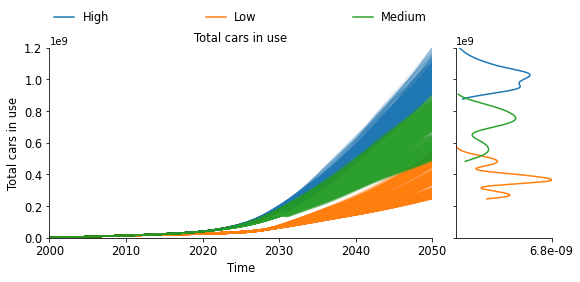

In [12]:
plot_clusters ('Total cars in use',experiments, 'EV clusters', zero = True, alpha=0.1)
fig = plt.gcf()
fig.set_size_inches(9,3.5)

## 4. Clusters: Wind energy

`dataset` input should have multiple elements.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator


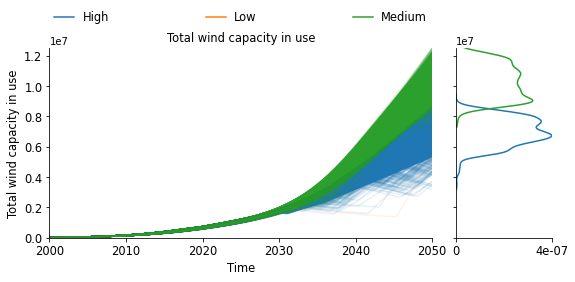

In [20]:
plot_clusters ('Total wind capacity in use',experiments, 'Wind clusters', zero = True, alpha=0.1)
fig = plt.gcf()
fig.set_size_inches(9,3.5)

In [21]:
experiments['Wind clusters2'] = experiments['Wind clusters'].astype(str)

In [22]:
experiments['Wind clusters2'][experiments['Wind clusters2'] == 'High'] = 'Medium1'
experiments['Wind clusters2'][experiments['Wind clusters2'] == 'Medium'] = 'High1'

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [23]:
experiments['Wind clusters2'][experiments['Wind clusters2'] == 'High1'] = 'High'
experiments['Wind clusters2'][experiments['Wind clusters2'] == 'Medium1'] = 'Medium'

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
experiments['Wind clusters'] = experiments['Wind clusters2'].astype(object)

`dataset` input should have multiple elements.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator


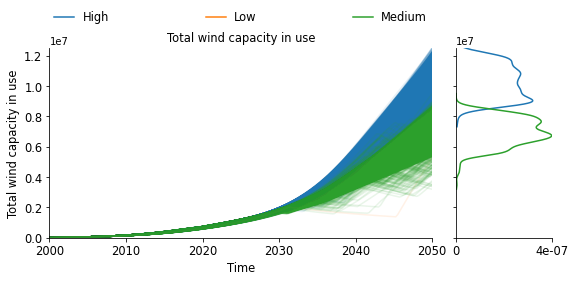

In [25]:
plot_clusters ('Total wind capacity in use',experiments, 'Wind clusters', zero = True, alpha=0.1)
fig = plt.gcf()
fig.set_size_inches(9,3.5)

In [26]:
experiments.drop('EV clusters2', axis=1, inplace= True)
experiments.drop('Wind clusters2', axis=1, inplace= True)

## 5. Save results

In [27]:
save_results(results, 'Results/Model_runs.tar.gz')

C:\Users\User\Anaconda3\lib\site-packages\ema_workbench\em_framework\outcomes.py:515: UserWarning: still to be tested!!
  warnings.warn("still to be tested!!")
